# Opis dát a preprocessing

Oficiálny opis a zdroj datasetu: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

### Time Occurred

> In 24 hour military time.

Teda v tvare *hhmm*. Tento atribút sme transformovali diskretizáciou na časové vedrá vyššieho konceptu nasledovne:

| Vedro         | Interval      |
| ------------- |:-------------:|
| night         | <2100, 500)   |
| morning       | <500, 1200)   |
| afternoon     | <1200, 1700)  |
| evening       | <1700, 2100)  |


### Crime Code

> Indicates the crime committed. 
> Crime Code 1 is the primary and most serious one. 
> Crime Code 2, 3, and 4 are respectively less serious offenses.
> Lower crime class numbers are more serious.

Crime code je rovnaky ako Crime code 1

Crime code 2-4 nie je vsade vyplneny, preto ho dropujeme

   => Preto sa zameriame na serious offenses, teda Crime Code
   
### Zone Id

> The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

Zone ID su geograficke zony dvadsiatychjednych Community Police Stations

### Premise Code/Description

> The type of structure, vehicle, or location where the crime took place.

### Victim Sex

> F - Female M - Male X - Unknown

### MO Codes

> Modus Operandi: Activities associated with the suspect in commission of the crime. See attached PDF for list of MO Codes in numerical order. 

> https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

### Descent Code: 

> - A - Other Asian 
- B - Black 
- C - Chinese 
- D - Cambodian
- F - Filipino
- G - Guamanian
- H - Hispanic/Latin/Mexican
- I - American Indian/Alaskan Native
- J - Japanese
- K - Korean
- L - Laotian
- O - Other
- P - PacificIslander
- S - Samoan
- U - Hawaiian
- V - Vietnamese
- W - White
- X - Unknown
- Z - Asian Indian

### Location

> The location where the crime incident occurred.
> Actual address is omitted for confidentiality. 
> XY coordinates reflect the nearest 100 block.

Location je kategorický atribút v tvare *(x, y)*.

### Address a Cross Street

>Address fields are only provided to the nearest hundred block in order to maintain privacy.

> Cross Street of rounded Address.

### Weapon Description/Weapon Used Code

> The type of weapon used in the crime. 

Tento atribút môžeme teoreticky použiť ako vlastnosť, ktorá hovorí o tom, či pri čine bola použitá zbraň,
alebo nie. Respektíve, môže hovoriť o tom, či bol čin násilný, alebo nie.


### Good info

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#nearest-neighbor-and-the-curse-of-dimensionality
- https://medium.com/@agarwalvibhor84/getting-started-with-machine-learning-using-sklearn-python-7d165618eddf
- http://efavdb.com/predicting-san-francisco-crimes/
- https://www.kaggle.com/jsmwoolf/los-angeles-crime-analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('data//Crime_Data_2010_2017.csv')

In [4]:
data.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"


In [5]:
# Odstranime Typy kriminalit s malym poctom unikatnych zaznamov
crime_values_counts = data['Crime Code Description'].value_counts()
#print(crime_values_counts.size)
#print(crime_values_counts.sum())
crime_values_counts.head(2)
separate_values = list(filter(lambda x: x, crime_values_counts.gt(100)))
separate_crimes = crime_values_counts[:len(separate_values)]
# count of separated crime values
#print(separate_crimes)

separate_crimes_types = separate_crimes.keys()

#delete data rows that have separated crime types
data = data.loc[data['Crime Code Description'].isin(separate_crimes_types)]


In [6]:
columns_to_drop = ['Area ID', 'Premise Code', 'Reporting District', 'Crime Code', 'MO Codes', 'Weapon Used Code', 'Weapon Description', 'Status Code', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street']
df_coldrop = data.drop(columns_to_drop, axis=1)
df_coldrop.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,Olympic,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,Invest Cont,510.0,VAN NESS,"(34.0454, -118.3157)"


In [7]:
# pocet bez NaN
# pandas pri slicingu robi iba VIEWS
# preto treba vytvorit novy DF pomocou copy()
df_victims_only = df_coldrop.dropna().copy()
len(df_victims_only)

1327209

In [8]:
len(df_victims_only['Premise Description'].unique())
# date occured - je to casvovy sled mozme usporiadat
# podobne prace, sklearn, podobne ulohy, kaggle
# bar plot - histogram = po dummy_variables, pozri, ktore sltpce maju malu pocetnost, vyhodit je
# location - pozriet rozdiely, min, max, dev?

210

In [9]:
print(len(df_victims_only['Location '].unique()))
# 58989 unikatnych GPS suradnic
print(len(df_victims_only['Address'].unique()))
# 68282 unikatnych Adries
print(len(df_victims_only['Area Name'].unique()))
# 21 unikatnych Area name

58987
68277
21


In [10]:
# def strip0(string):
#     l = string.split(',').replace('')
#     return (l[0], l[1])
import re

def coords_f(coord):
    matchObj = re.match(r'\((.*), (.*)\)', coord)
    return (matchObj.group(1), matchObj.group(2))
coords_tuples = list(map(coords_f, df_victims_only['Location '].unique()))
#coords_tuples
# min(coords_tuples, key = lambda x: x[0])


In [11]:
df_victims_only['Time Occurred'].head(10)

0     1800
4     2300
5     1400
9      800
12    1200
13    1200
14    2030
15     500
16    1420
17    1430
Name: Time Occurred, dtype: int64

In [12]:
# cas sme rozbinovali na kategoricke premenne podla intervalov:
# (2100, 500> night
# (500, 1200> morning
# (1200, 1700> afternoon
# (1700, 2100> evening
df_victims_only['Time Occurred'] = pd.cut(df_victims_only['Time Occurred'], [0, 500, 1200, 1700, 2100, 2400], labels=['night', 'morning', 'afternoon', 'evening', 'night2']).replace('night2', 'night')

In [13]:
# Victim age z float do int
a = df_victims_only["Victim Age"].astype(int).copy()
df_victims_only["Victim Age"] = a

In [14]:
df_victims_only.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,evening,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
4,42104479,01/11/2014,01/04/2014,night,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84,M,W,SINGLE FAMILY DWELLING,Invest Cont,745.0,7200 CIRRUS WY,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,afternoon,Central,CRIMINAL HOMICIDE,49,F,W,SINGLE FAMILY DWELLING,Adult Arrest,110.0,600 N HILL ST,"(34.0591, -118.2412)"
9,120908292,03/29/2013,01/15/2013,morning,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27,F,O,OTHER BUSINESS,Invest Cont,668.0,7200 SEPULVEDA BL,"(34.2012, -118.4662)"
12,121207315,02/22/2013,02/13/2013,morning,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),42,M,H,PARKING LOT,Invest Cont,440.0,82ND,"(33.9651, -118.2783)"


In [15]:
descent_without_whb = list(df_victims_only['Victim Descent'].unique())
descent_without_whb = filter(lambda x: x != 'W', descent_without_whb)
descent_without_whb = filter(lambda x: x != 'H', descent_without_whb)
descent_without_whb = filter(lambda x: x != 'B', descent_without_whb)
descent_without_whb = {x[0]:'O' for x in descent_without_whb }

Text(0.5,1,'Obete podla povodu')

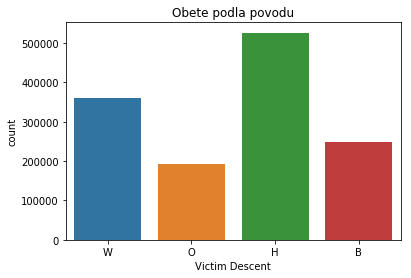

In [16]:
# Spojime O povod s ostatnymi
df_descent_merge = df_victims_only.copy()
df_descent_merge['Victim Descent'] = df_victims_only['Victim Descent'].replace(descent_without_whb)
df_descent_merge['Victim Descent'].unique()
sns.countplot('Victim Descent', data=df_descent_merge).set_title('Obete podla povodu')


In [17]:
features = df_descent_merge[['Area Name', 'Time Occurred', 'Crime Code Description', 'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Description']]
features.columns

Index(['Area Name', 'Time Occurred', 'Crime Code Description', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Description'],
      dtype='object')

In [18]:
from collections import Counter
targets = features['Crime Code Description']
target_values = targets.get_values()
target_keys = targets.keys
unique_words = set(target_values)
# print most common categories

#print(Counter(target_values).most_common())

# Get other indexes
other_indexes = []
rows = targets.iteritems()
for row in rows:
    if row[1] == 'vehicle_theft':
        other_indexes.append(row[0])
#other_indexes

targets = targets.drop(other_indexes)
features = features.drop(other_indexes)
print(features.columns)
crime_values_counts = features['Crime Code Description'].value_counts()


Index(['Area Name', 'Time Occurred', 'Crime Code Description', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Description'],
      dtype='object')


In [19]:
# group crimes
others_crimes =  ['STALKING',
 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
 'TRESPASSING',
 'COUNTERFEIT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'OTHER MISCELLANEOUS CRIME',
 'INDECENT EXPOSURE',
 'BOMB SCARE',
 'EXTORTION',
 'DISTURBING THE PEACE',
 'CHILD ANNOYING (17YRS & UNDER)',
 'BRANDISH WEAPON',
 'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
 'VIOLATION OF COURT ORDER',
 'LETTERS, LEWD',
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
 'FALSE IMPRISONMENT',
 'ARSON',
 'VIOLATION OF RESTRAINING ORDER',
 'CRUELTY TO ANIMALS',
 'LEWD CONDUCT',
 'PROWLER',
 'PIMPING',
 'RESISTING ARREST',
 'PEEPING TOM',
 'SEX, UNLAWFUL',
 'RECKLESS DRIVING',
 'ORAL COPULATION',
 'THREATENING PHONE CALLS/LETTERS',
 'UNAUTHORIZED COMPUTER ACCESS',
 'DISCHARGE FIREARMS/SHOTS FIRED',
 'CHILD NEGLECT (SEE 300 W.I.C.)',
 'CHILD STEALING',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
 'BUNCO, ATTEMPT',
 'BRIBERY',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
 'WEAPONS POSSESSION/BOMBING',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)',
 'ILLEGAL DUMPING',
 'DOCUMENT WORTHLESS ($200.01 & OVER)',
 'FAILURE TO YIELD',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
 'FALSE POLICE REPORT',
 'ABORTION/ILLEGAL',
 'CONTRIBUTING',
 'DRUNK ROLL',
 'DISRUPT SCHOOL',
 'INCITING A RIOT',
 'FAILURE TO DISPERSE',
 'PANDERING',
 'TILL TAP - PETTY ($950 & UNDER)',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
 'CHILD ABANDONMENT',
 'TELEPHONE PROPERTY - DAMAGE',
 'CONTEMPT OF COURT',
 'CONSPIRACY',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
 'BIGAMY',
 'DRUNK ROLL - ATTEMPT',
 'DOCUMENT WORTHLESS ($200 & UNDER)',
 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
 'BLOCKING DOOR INDUCTION CENTER',
 'DRUGS, TO A MINOR',
 'KIDNAPPING - GRAND ATTEMPT',
 'TRAIN WRECKING']

In [20]:
assault_crimes = ['INTIMATE PARTNER - SIMPLE ASSAULT',
 'CRIMINAL HOMICIDE',
 'BATTERY - SIMPLE ASSAULT',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'THROWING OBJECT AT MOVING VEHICLE',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'BATTERY WITH SEXUAL CONTACT',
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
 'OTHER ASSAULT',
 'RAPE, FORCIBLE',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 'SHOTS FIRED AT INHABITED DWELLING',
 'BATTERY POLICE (SIMPLE)',
 'RAPE, ATTEMPTED',
 'KIDNAPPING',
 'BATTERY ON A FIREFIGHTER',
 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
 'LYNCHING - ATTEMPTED',
 'LYNCHING',
 'MANSLAUGHTER, NEGLIGENT',
]

In [21]:
theft_crimes = [
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
 'DOCUMENT FORGERY / STOLEN FELONY',
 'BIKE - STOLEN',
 'ROBBERY',
 'ATTEMPTED ROBBERY',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
 'BURGLARY FROM VEHICLE',
 'BURGLARY',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
 'THEFT, PERSON',
 'THEFT PLAIN - ATTEMPT',
 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
 'THEFT OF IDENTITY',
 'BUNCO, GRAND THEFT',
 'PURSE SNATCHING',
 'BURGLARY FROM VEHICLE, ATTEMPTED',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'BURGLARY, ATTEMPTED',
 'BUNCO, PETTY THEFT',
 'BIKE - ATTEMPTED STOLEN',
 'PICKPOCKET',
 'THEFT FROM PERSON - ATTEMPT',
 'PICKPOCKET, ATTEMPT',
 'PURSE SNATCHING - ATTEMPT',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
 'SHOPLIFTING - ATTEMPT',
 'DISHONEST EMPLOYEE - PETTY THEFT',
 'DISHONEST EMPLOYEE - GRAND THEFT',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
 'GRAND THEFT / INSURANCE FRAUD',
 'GRAND THEFT / AUTO REPAIR',
 'PETTY THEFT - AUTO REPAIR',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
 'BOAT - STOLEN',
 'THEFT, COIN MACHINE - ATTEMPT',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT',

]

In [22]:
vehicle_theft_crimes = [
 'VEHICLE - STOLEN',
 'VEHICLE - ATTEMPT STOLEN',
]

In [23]:
crimes_classification = {
    'vehicle_theft': vehicle_theft_crimes,
    'theft': theft_crimes,
    'assault': assault_crimes,
    'other': others_crimes
}

In [24]:
# Group crime code description to new categories

new_target_values = features['Crime Code Description']
new_target_values = new_target_values.replace(crimes_classification.get('vehicle_theft'), 'vehicle_theft') \
    .replace(crimes_classification.get('theft'), 'theft') \
    .replace(crimes_classification.get('assault'), 'assault') \
    .replace(crimes_classification.get('other'), 'other')
    
feature_generator = features.iterrows
#print(features.index.tolist())
for i in features.index.tolist():
    features.at[i, 'Crime Code Description'] = new_target_values[i]


In [25]:
print(features.head(1))

     Area Name Time Occurred Crime Code Description  Victim Age Victim Sex  \
0  77th Street       evening                assault          30          F   

  Victim Descent                           Premise Description  
0              W  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  


In [26]:
# One hot encoding pomocou pd.get_dummies
# Zakodujeme vsetky kategoricke okrem zavislej premennej (a victim age)
dependent_var = 'Crime Code Description'
cols_to_encode = list(features.columns)
cols_to_encode.remove(dependent_var)
cols_to_encode.remove('Victim Age')
one_hotted = pd.get_dummies(features, columns=cols_to_encode)
one_hotted.shape

(1327209, 247)

In [27]:
# Vytvorenie label a target
targets = one_hotted[dependent_var]
feature_cols = list(one_hotted.columns)
#print(one_hotted.columns)
feature_cols.remove(dependent_var)
#print(feature_cols)
features = one_hotted[feature_cols]
features.shape

(1327209, 246)

In [28]:
 from collections import Counter
new_target_values.value_counts()
targets = new_target_values
target_values = targets.get_values()
target_keys = targets.keys
unique_words = set(target_values)
# print most common categories

print(Counter(target_values).most_common())

# Get other indexes
other_indexes = []
rows = targets.iteritems()
for row in rows:
    if row[1] == 'vehicle_theft':
        other_indexes.append(row[0])
other_indexes

targets = targets.drop(other_indexes)
features = features.drop(other_indexes)

[('theft', 692288), ('assault', 376137), ('other', 256222), ('vehicle_theft', 2562)]


In [29]:
# Random under-sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(features, targets)
#X_rus = None
#y_rus = None
#print('Removed indexes: ', id_rus)
print(Counter(y_rus).most_common())
print(id_rus[0])
#rus_targets = targets.drop(id_rus)
#rus_features = features.drop(id_rus)


[('assault', 256222), ('other', 256222), ('theft', 256222)]
23348


In [30]:
features = X_rus
targets = y_rus

In [31]:
#new_features = pd.Series()
#drop_indexes = []
#for index in features.index.values:
#    if index in id_rus:
#        drop_indexes.append(index)

#new_feauter = features.drop(features.index[id_rus])
#new_targets = targets.drop(targets.index[id_rus])
#print(drop_indexes.count)
#print(features.shape)
#print(id_rus.size)
#from collections import Counter
#target_values = new_targets.get_values()
#print(Counter(target_values).most_common())

#target_values2 = targets.get_values()
#print(Counter(target_values2).most_common())

In [32]:


#new_features = features.drop(drop_indexes)
#new_targets = targets.drop(targets.index[drop_indexes])




In [33]:
#print(len(drop_indexes))
#new_features.shape

In [34]:
from sklearn.model_selection import train_test_split

# Rozdelime dataset na 3:1
# Random_state nastavime na seed random hodnotu pre zachovanie determinickosti
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=42)

In [35]:
from sklearn.externals import joblib
# perzistujeme train a test data
# ktore su ocistene
joblib.dump(X_train, 'tmp/X_train.pkl')
joblib.dump(X_test, 'tmp/X_test.pkl')

joblib.dump(y_train, 'tmp/y_train.pkl')
joblib.dump(y_test, 'tmp/y_test.pkl')

['tmp/y_test.pkl']

In [36]:
# save test and train data after random undersampling



In [ ]:
# LEGACY KOD- PREMIGROVAT DO SVM.IPYNB

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train) 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, featurs, labels, cv=5)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(featurs)
X_pca = pca.transform(featurs)
print("original shape:   ", featurs.shape)
print("transformed shape:", X_pca.shape)
X_pca

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Počet komponentov')
plt.ylabel('Kumulatívne vysvetlená variancia');



In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, svd_solver='randomized')
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

In [ ]:
scores2 = cross_val_score(model, featurs, labels, cv=2)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))